### Notebook to compute and visualise cellular proportions per conditions in the scCOPD dataset

- **Developed by**: Carlos Talavera-López Ph.D
- **Institute of Computational Biology - Computational Health Centre - Helmholtz Munich**
- v221013

### Load required modules

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

### Set up working environment

In [2]:
plt.show()

sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                         9.2.0
asttokens                   NA
backcall                    0.2.0
beta_ufunc                  NA
binom_ufunc                 NA
cffi                        1.15.1
colorama                    0.4.5
cycler                      0.10.0
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.1
entrypoints                 0.4
executing                   0.8.3
h5py                        3.7.0
hypergeom_ufunc             NA
ipykernel                   6.9.1
jedi                        0.18.1
joblib                      1.2.0
kiwisolver                  1.4.4
llvmlite                    0.39.1
matplotlib                  3.6.1
matplotlib_inline           NA
mpl_toolkits                NA
natsort                     8.2.0
nbinom_ufunc                NA
ncf_ufunc                   NA
numba                       0.56.2
numpy                   

### Read in data

In [3]:
sc_copd = sc.read_h5ad('/home/cartalop/data/single_cell/lung/influenza/working_objects/scnym_annotated/BrEpit_All_scnym-labelled_ctl221012.h5ad')
sc_copd

AnnData object with n_obs × n_vars = 131366 × 18482
    obs: 'sex', 'age', 'condition', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'doublet_scores', 'predicted_doublets', 'sample_group', 'cell_states', 'group', 'domain_label', 'scNym', 'scNym_confidence', 'object'
    var: 'mt', 'ribo', 'n_cells_by_counts-V1', 'mean_counts-V1', 'pct_dropout_by_counts-V1', 'total_counts-V1', 'n_cells_by_counts-V2', 'mean_counts-V2', 'pct_dropout_by_counts-V2', 'total_counts-V2', 'n_cells_by_counts-V3', 'mean_counts-V3', 'pct_dropout_by_counts-V3', 'total_counts-V3', 'n_cells_by_counts-V4', 'mean_counts-V4', 'pct_dropout_by_counts-V4', 'total_counts-V4', 'n_cells_by_counts-V5', 'mean_counts-V5', 'pct_dropout_by_counts-V5', 'total_counts-V5'

### Visualise cell-proportions per disease

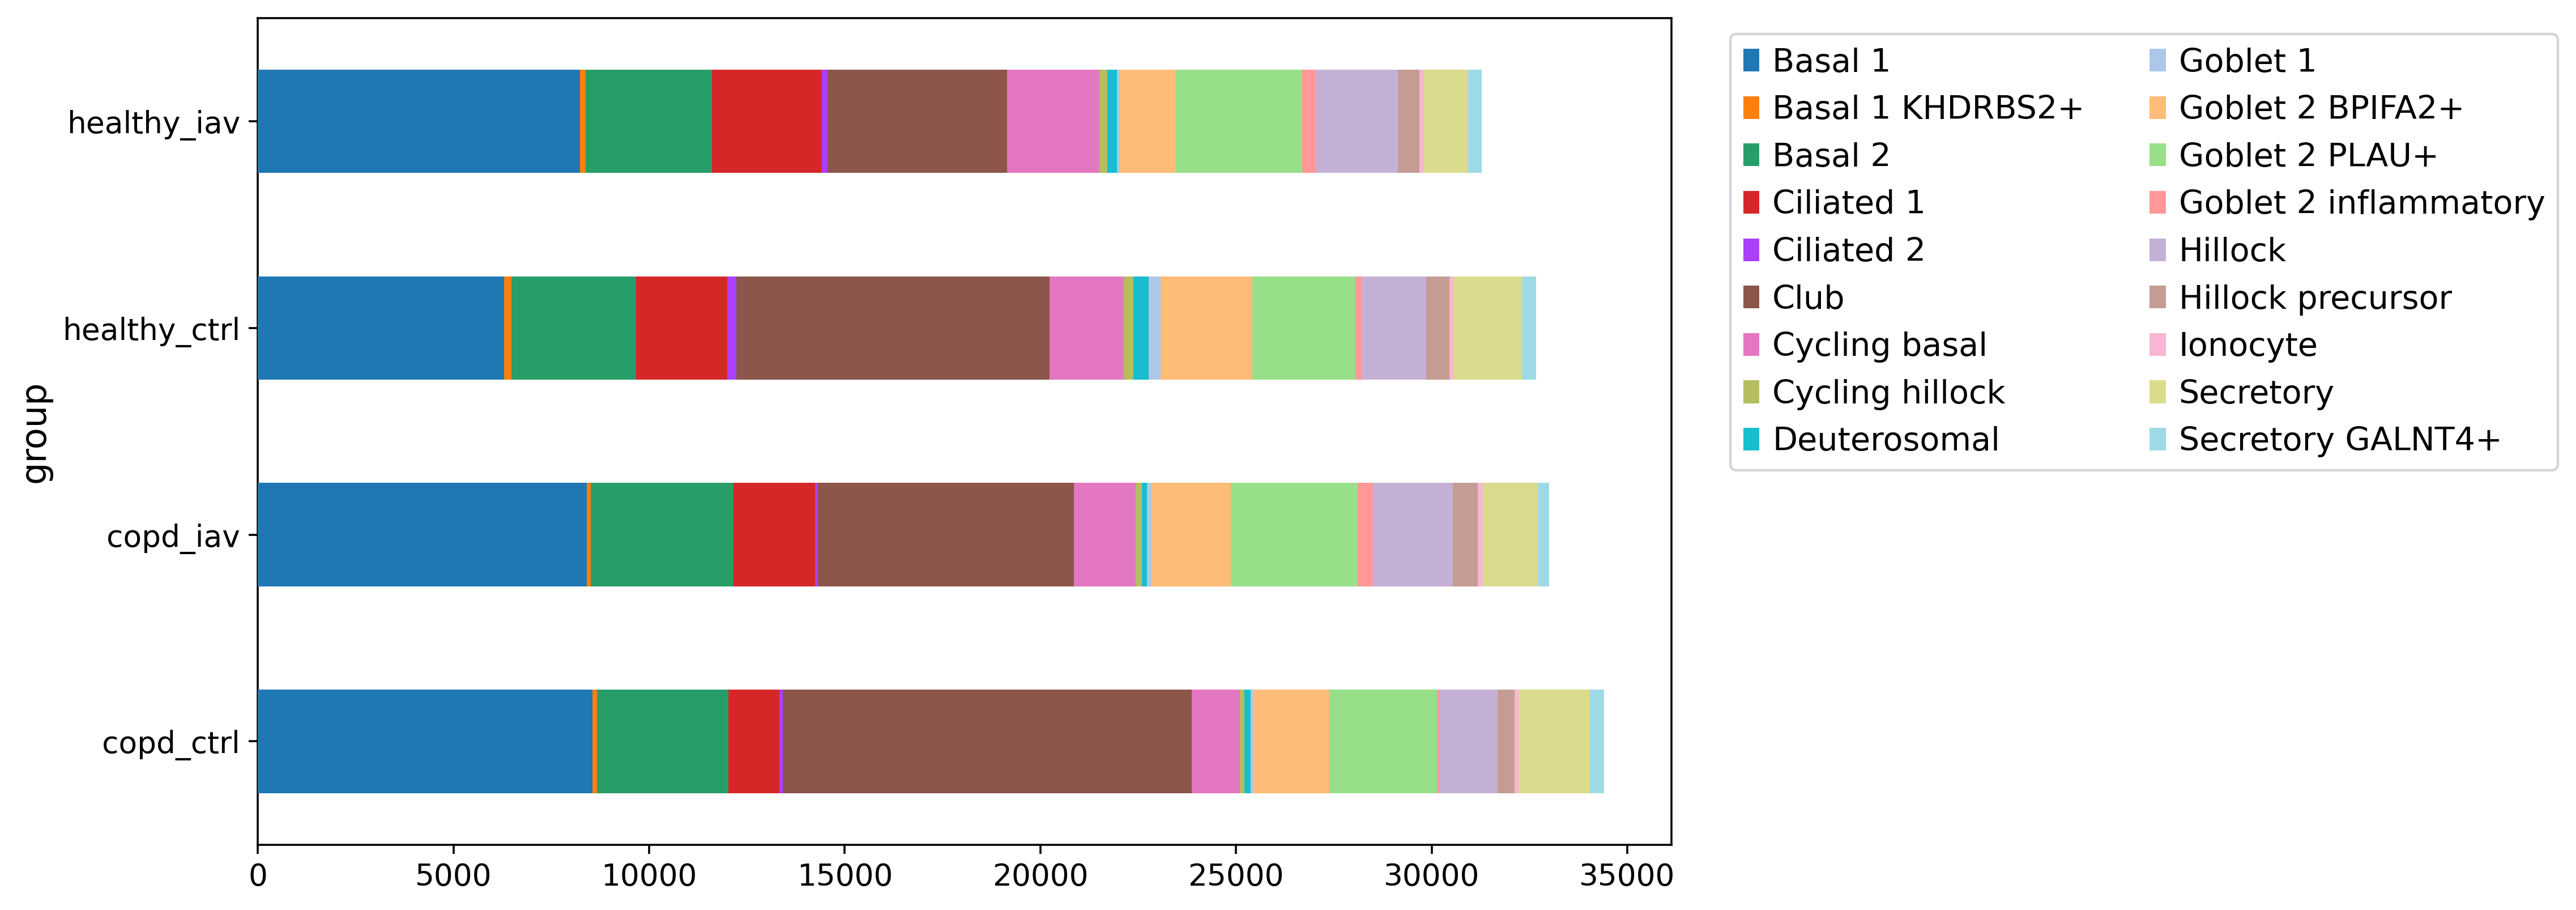

In [4]:
ax1 = pd.crosstab(sc_copd.obs['group'], sc_copd.obs['scNym']).plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (10,6), fontsize = 12, grid = False)
horiz_offset = 1.03
vert_offset = 1.0
ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset), ncol = 2)

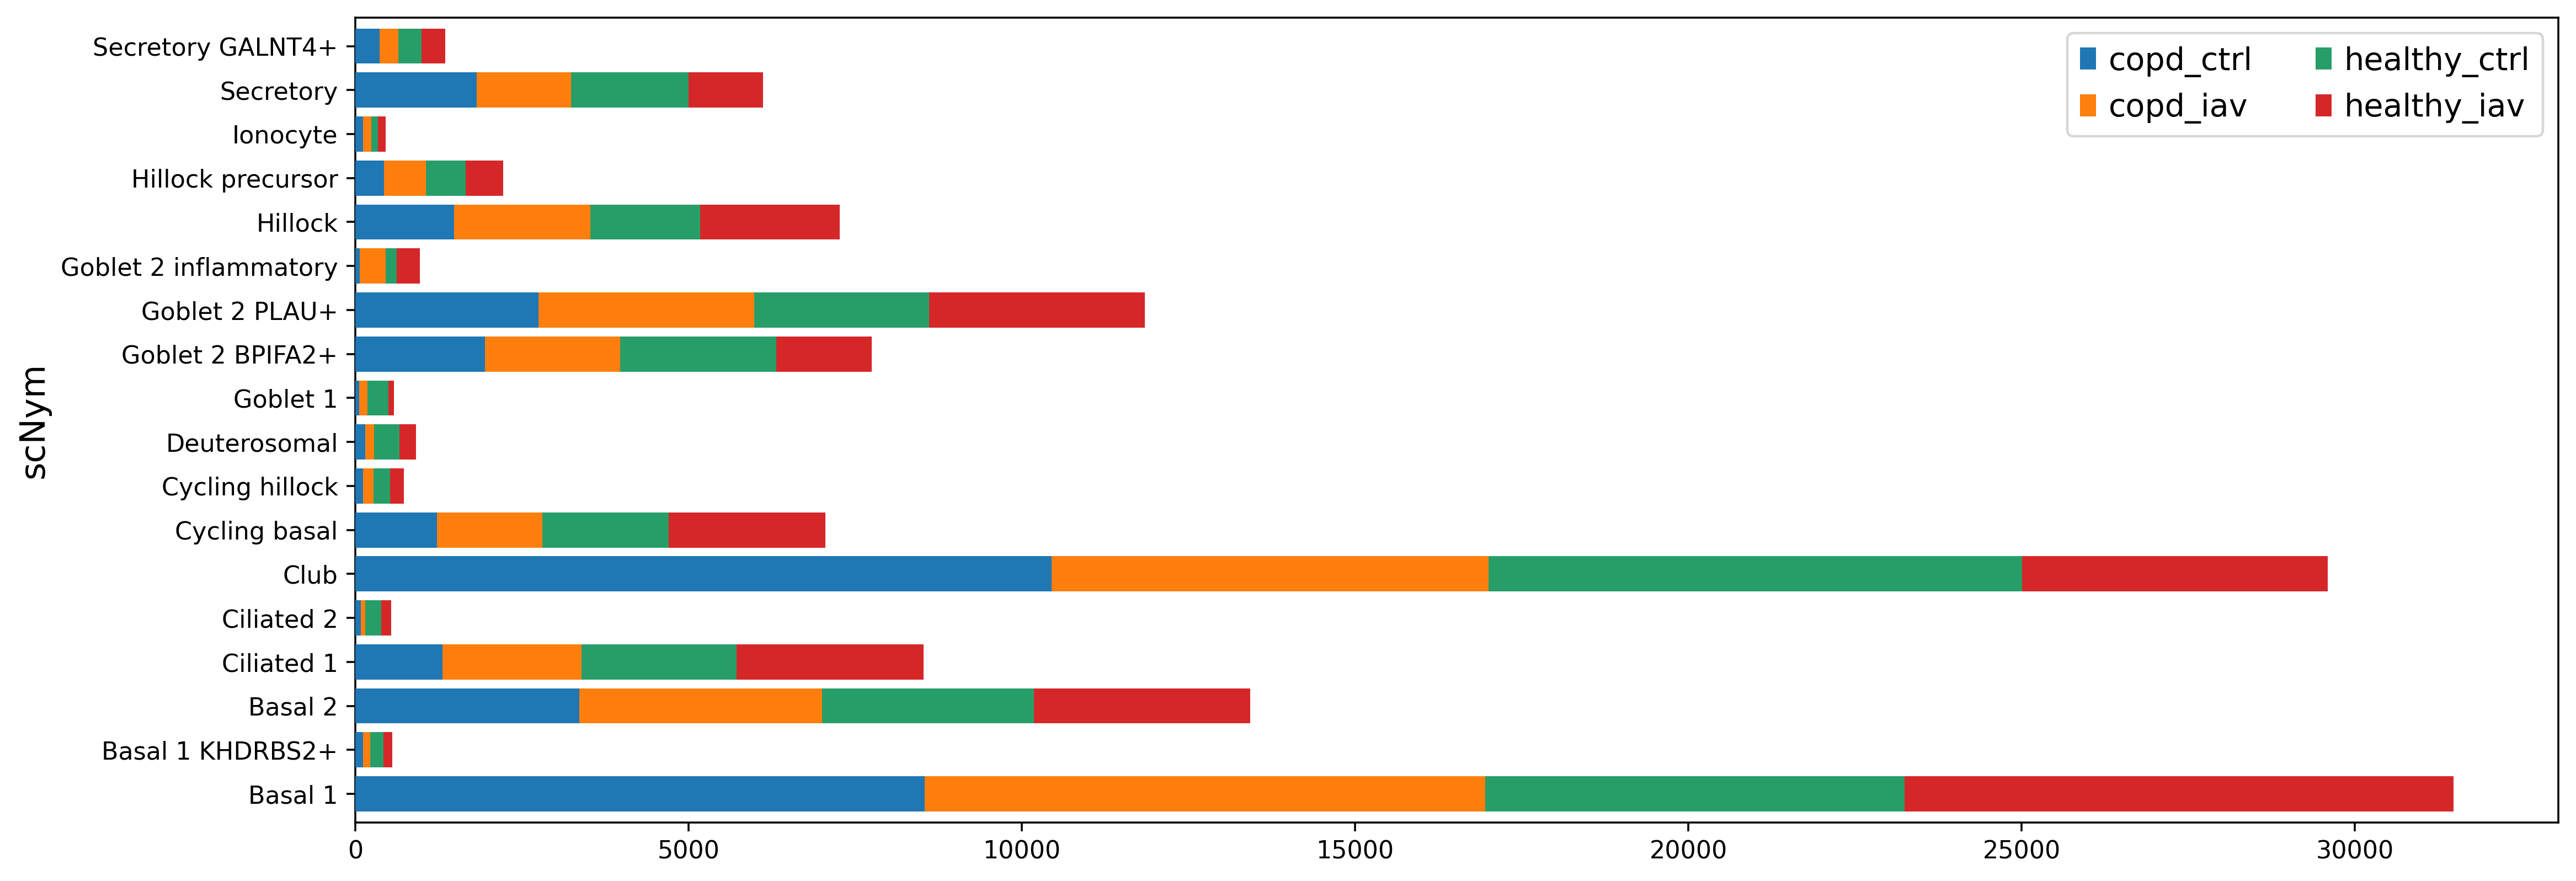

In [13]:
ax1 = pd.crosstab(sc_copd.obs['scNym'], sc_copd.obs['group']).plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (16,6), fontsize = 10, grid = False, width = 0.8)
horiz_offset = 1.0
vert_offset = 1.0
ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset), ncol = 2)

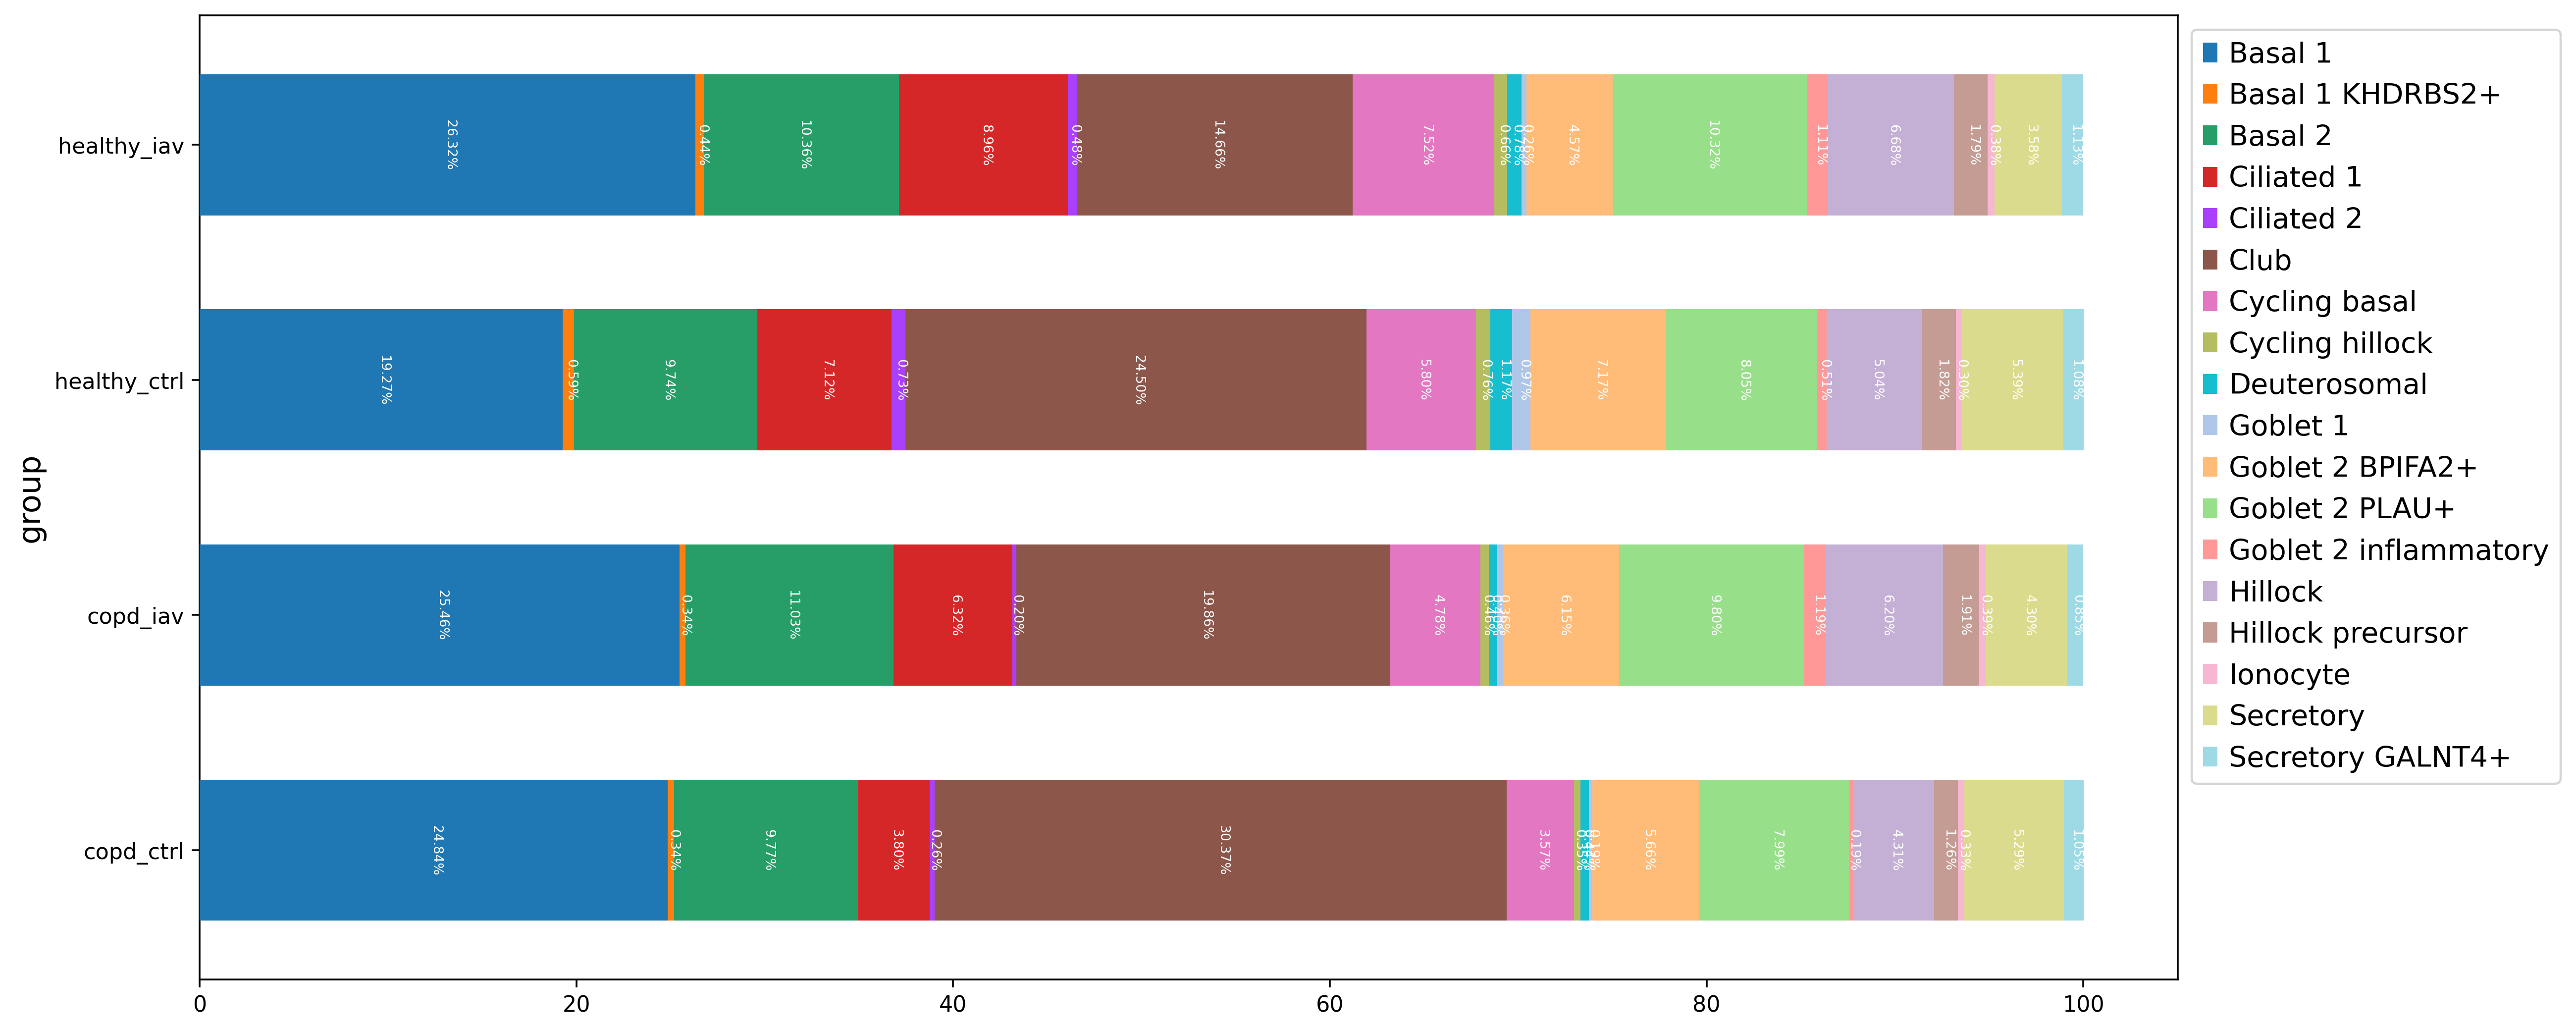

In [34]:
data = pd.crosstab(sc_copd.obs['group'], sc_copd.obs['scNym'])
totals = data.sum(axis = 1)
percent = data.div(totals, axis = 0).mul(100).round(2)

ax1 = percent.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (16,8), fontsize = 10, grid = False, width = 0.6)
horiz_offset = 1.0
vert_offset = 1.0
ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset), ncol = 1)

for c in ax1.containers:
    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{w:0.2f}%' if (w := v.get_width()) > 0 else '' for v in c]
    
    # add annotations
    ax1.bar_label(c, labels = labels, label_type = 'center', padding = 1, color = 'black', rotation = 270, fontsize = 6)

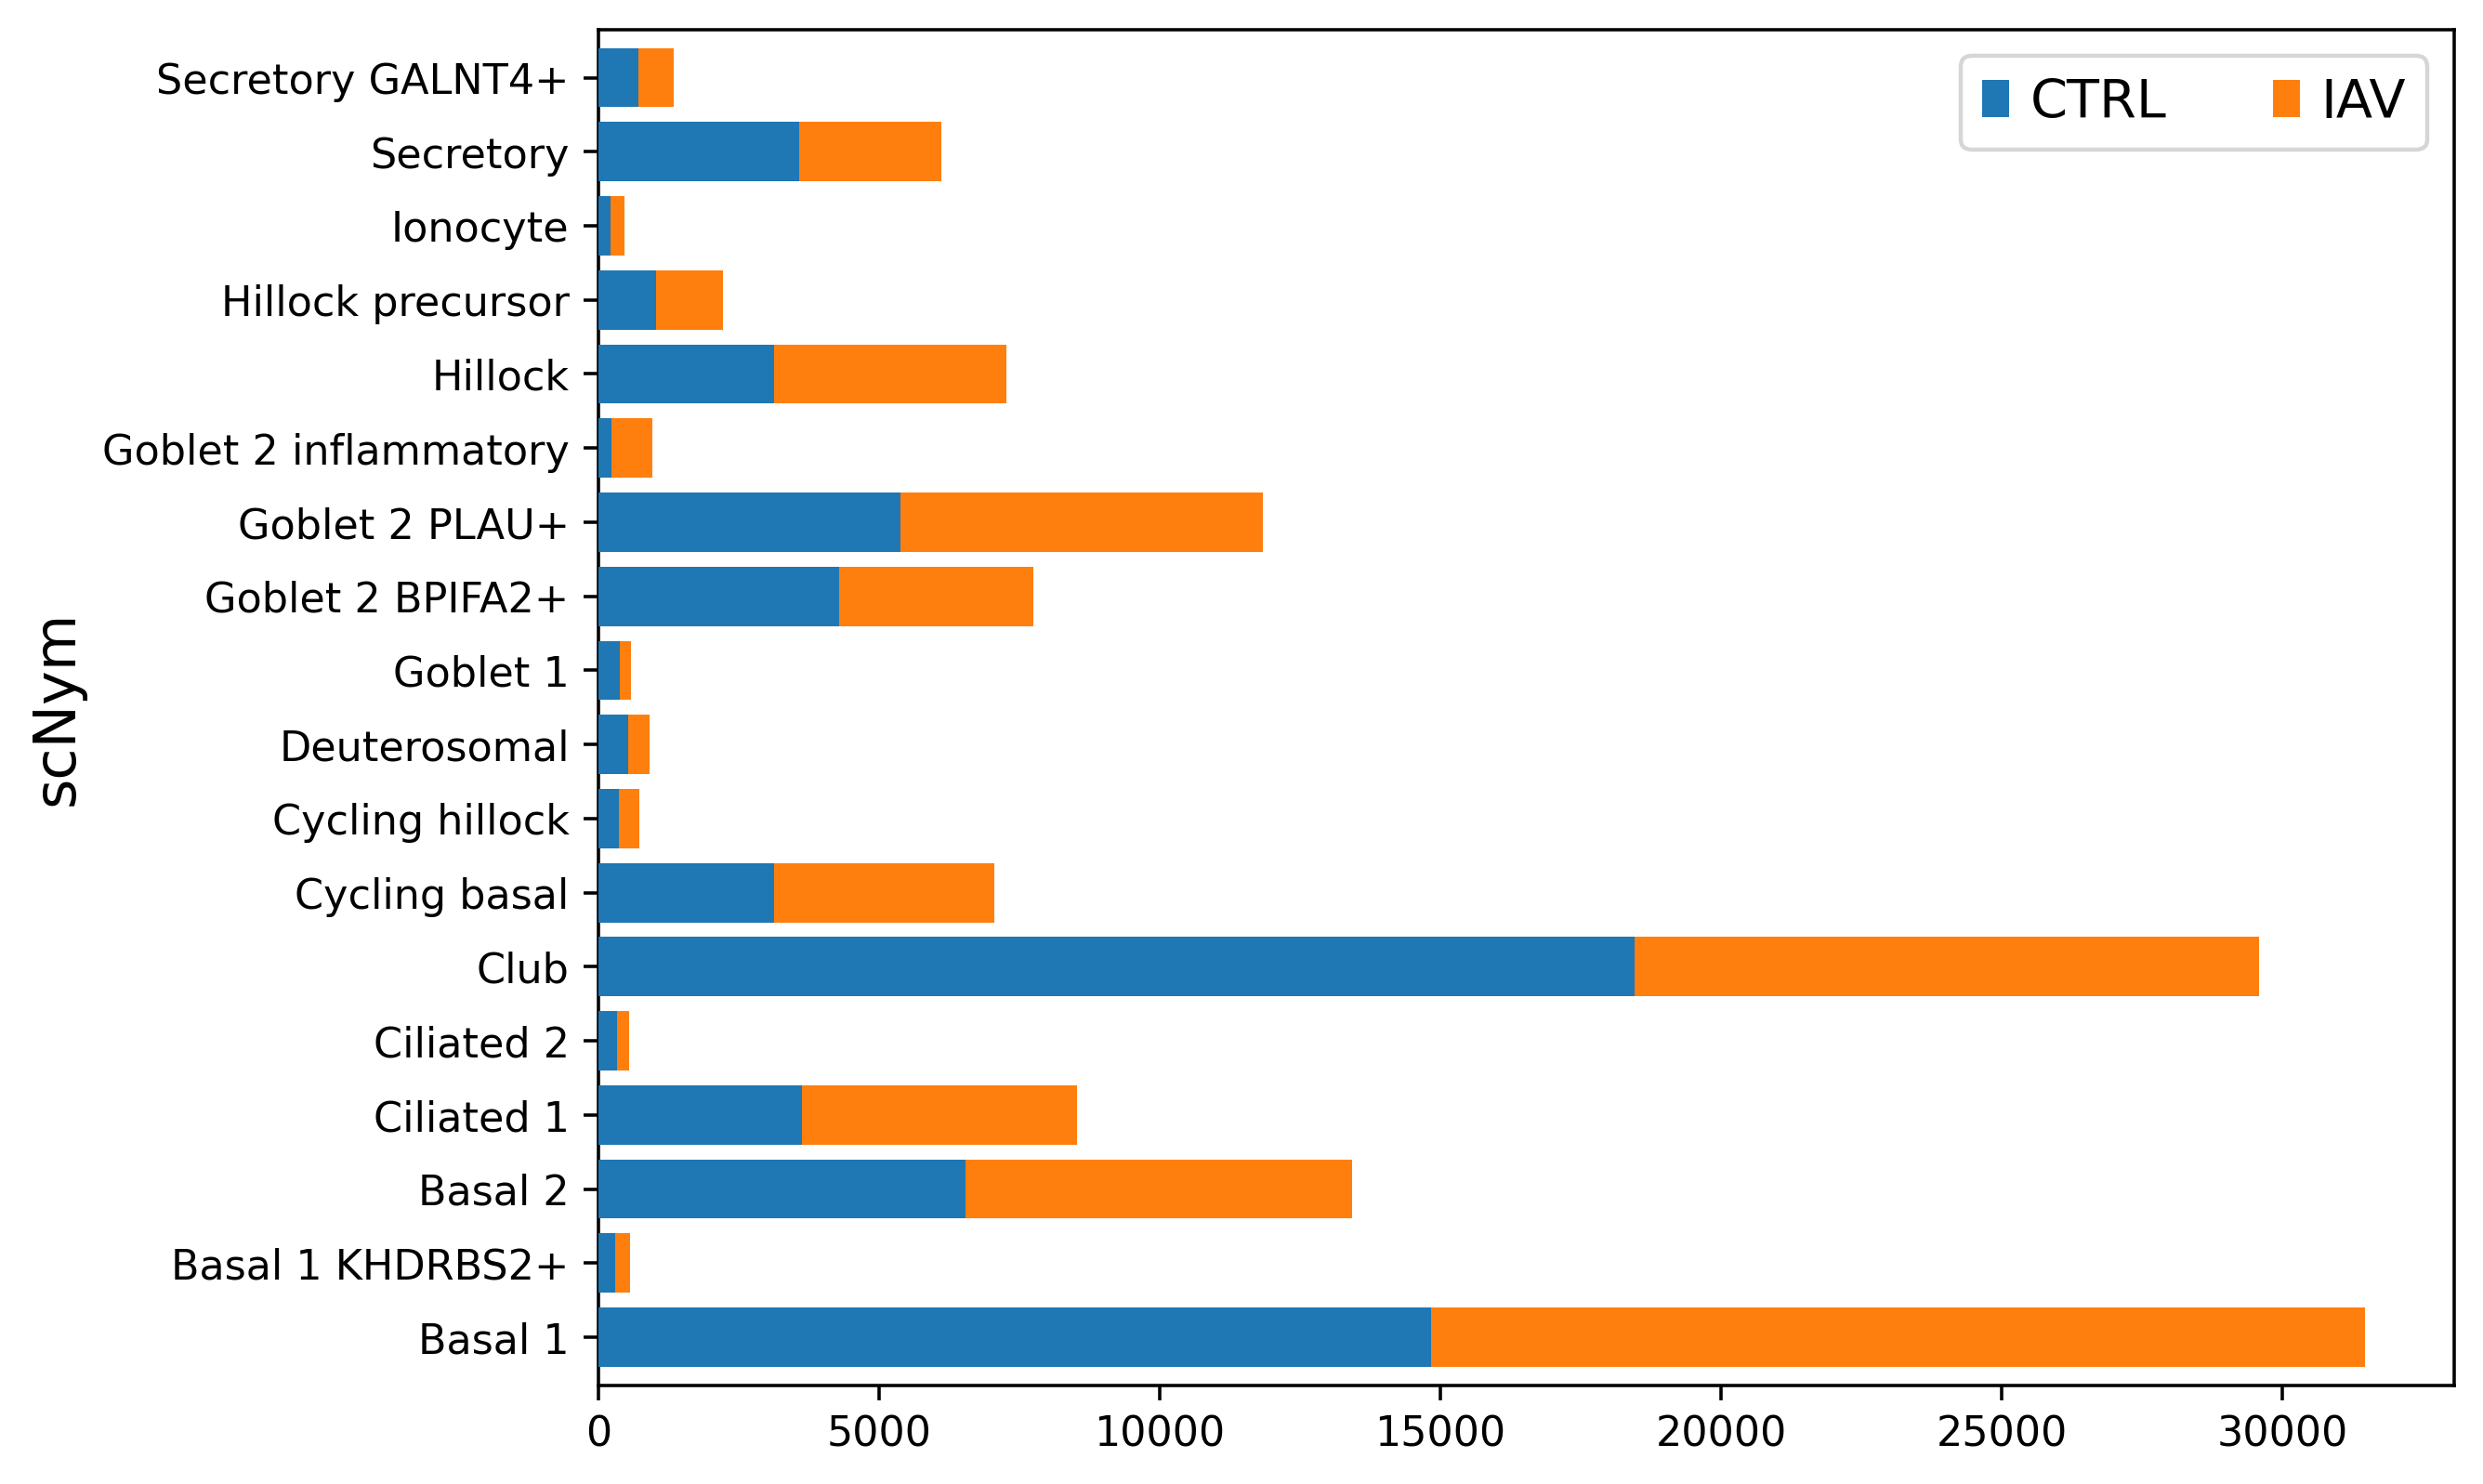

In [6]:
ax1 = pd.crosstab(sc_copd.obs['scNym'], sc_copd.obs['infection']).plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (8,6), fontsize = 10, grid = False, width = 0.8)
horiz_offset = 1.0
vert_offset = 1.0
ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset), ncol = 3)

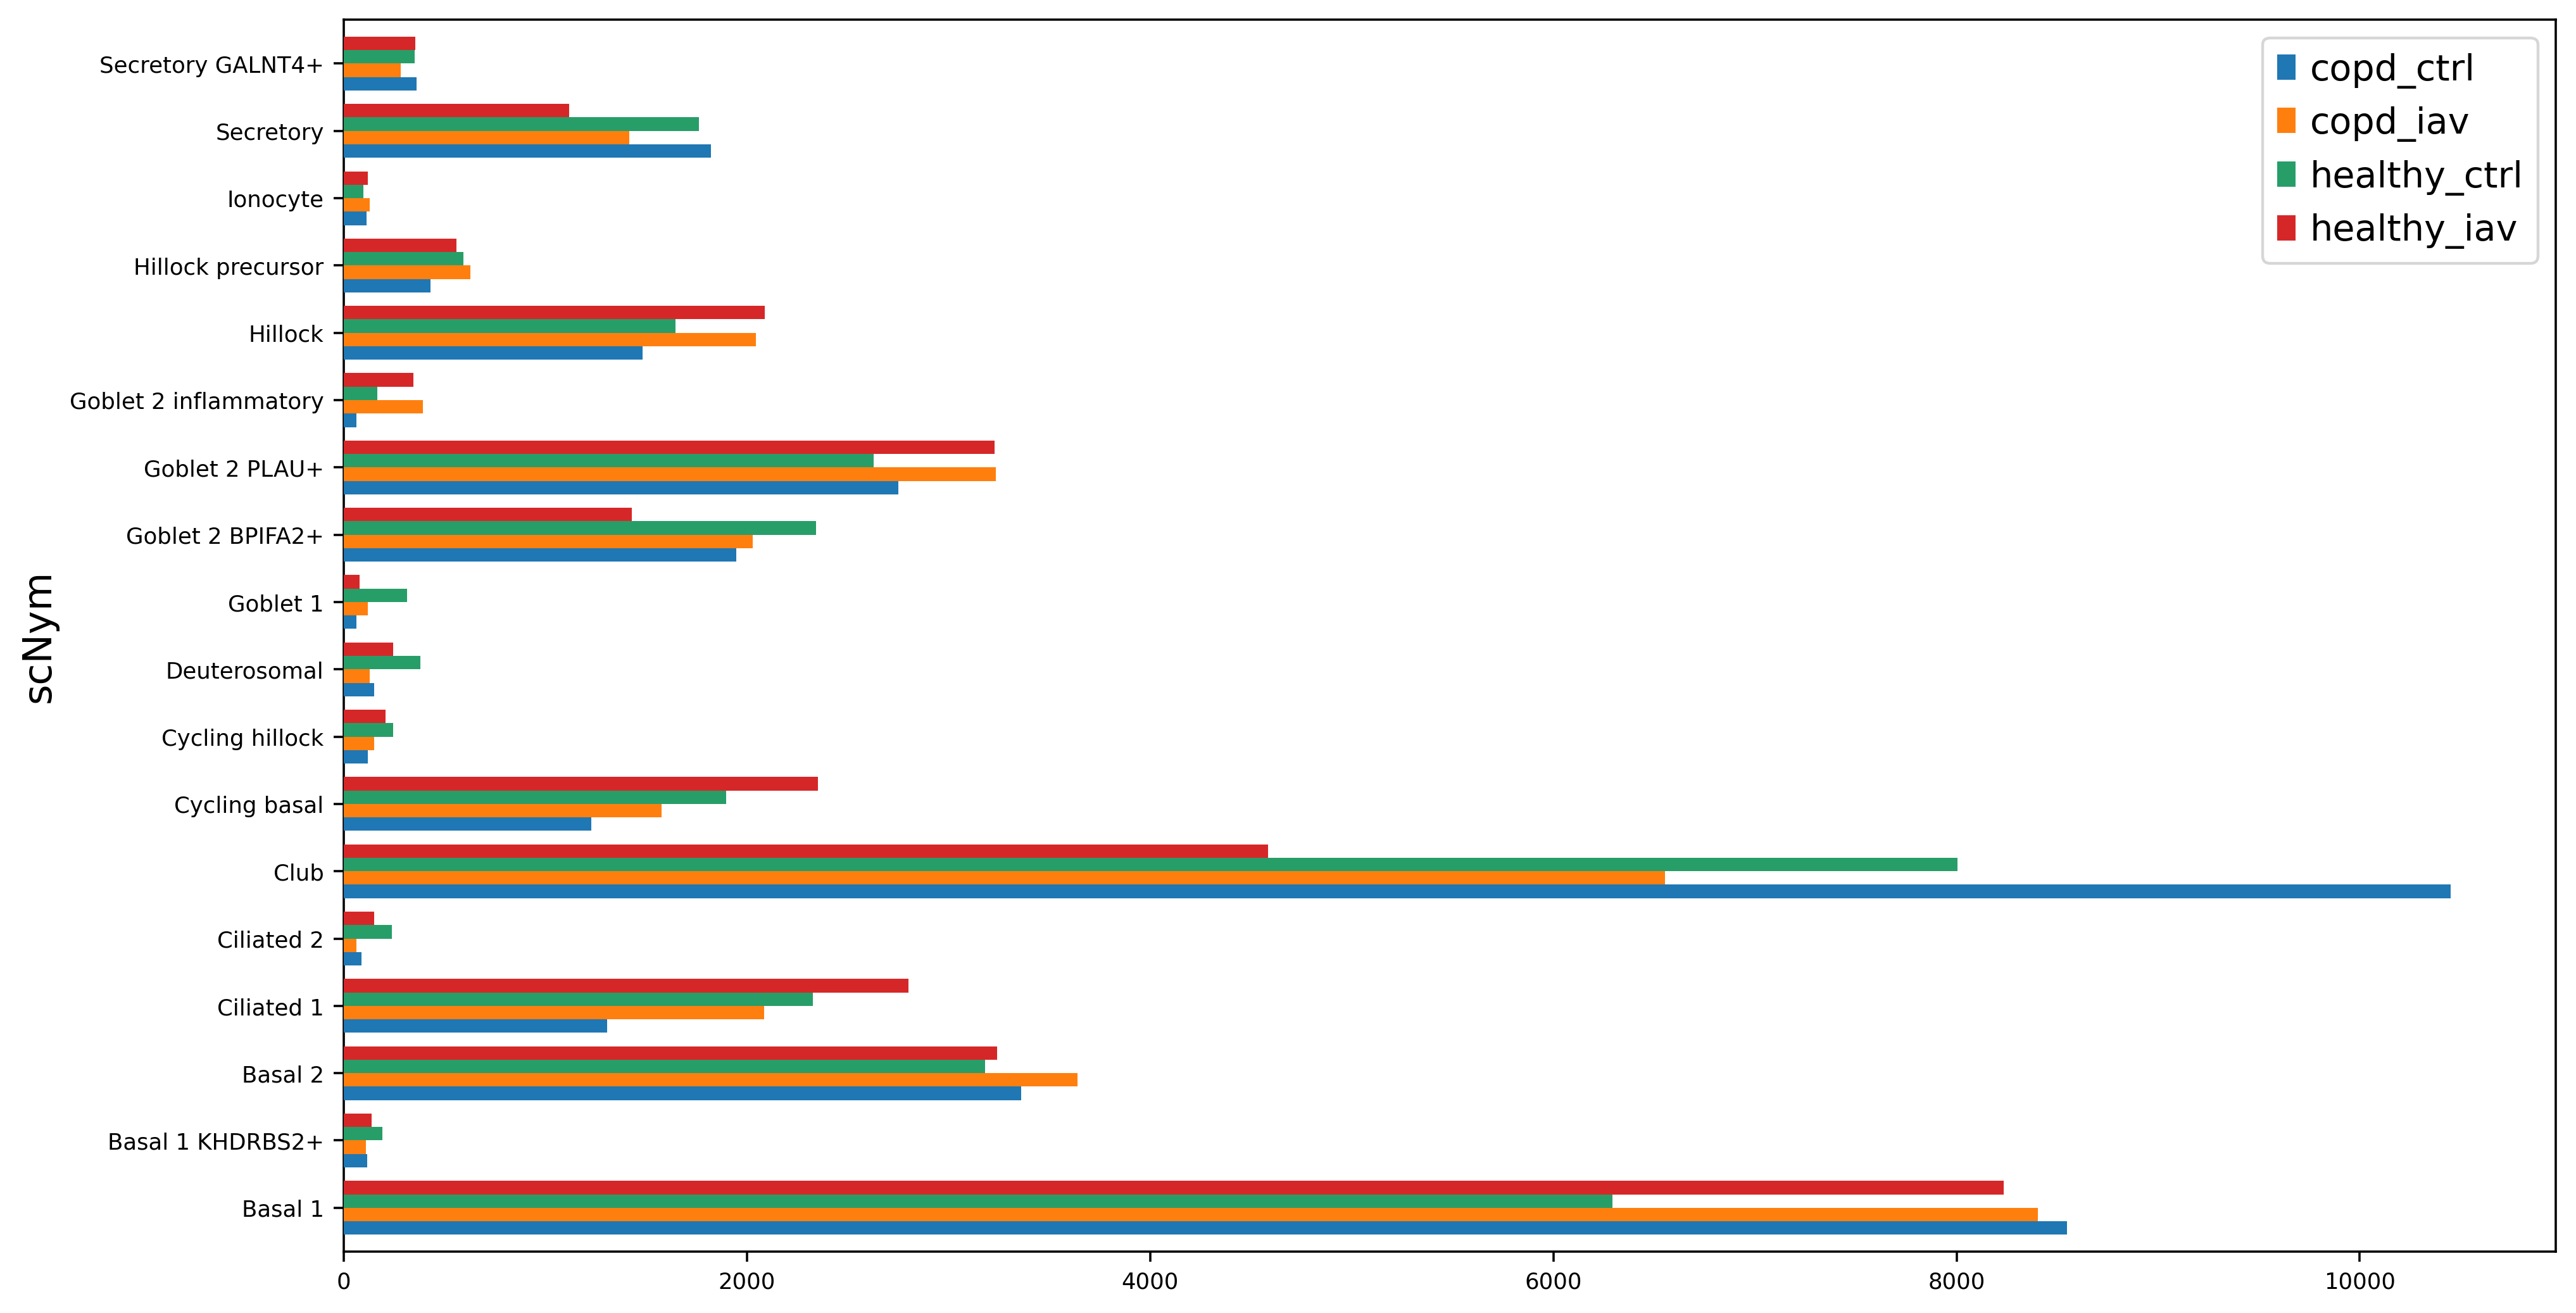

In [7]:
ax1 = pd.crosstab(sc_copd.obs['scNym'], sc_copd.obs['group']).plot.barh(stacked = False, edgecolor = 'none', zorder = 3, figsize = (14,8), fontsize = 8, grid = False, width = 0.8)
horiz_offset = 1.0
vert_offset = 1.0
ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset), ncol = 1)

In [8]:
table = pd.crosstab(sc_copd.obs['scNym'], sc_copd.obs['group'])
table_melted = pd.melt(table)
table_melted.head()

,group,value
0,copd_ctrl,8547
1,copd_ctrl,117
2,copd_ctrl,3361
3,copd_ctrl,1308
4,copd_ctrl,88


<AxesSubplot: xlabel='group', ylabel='value'>

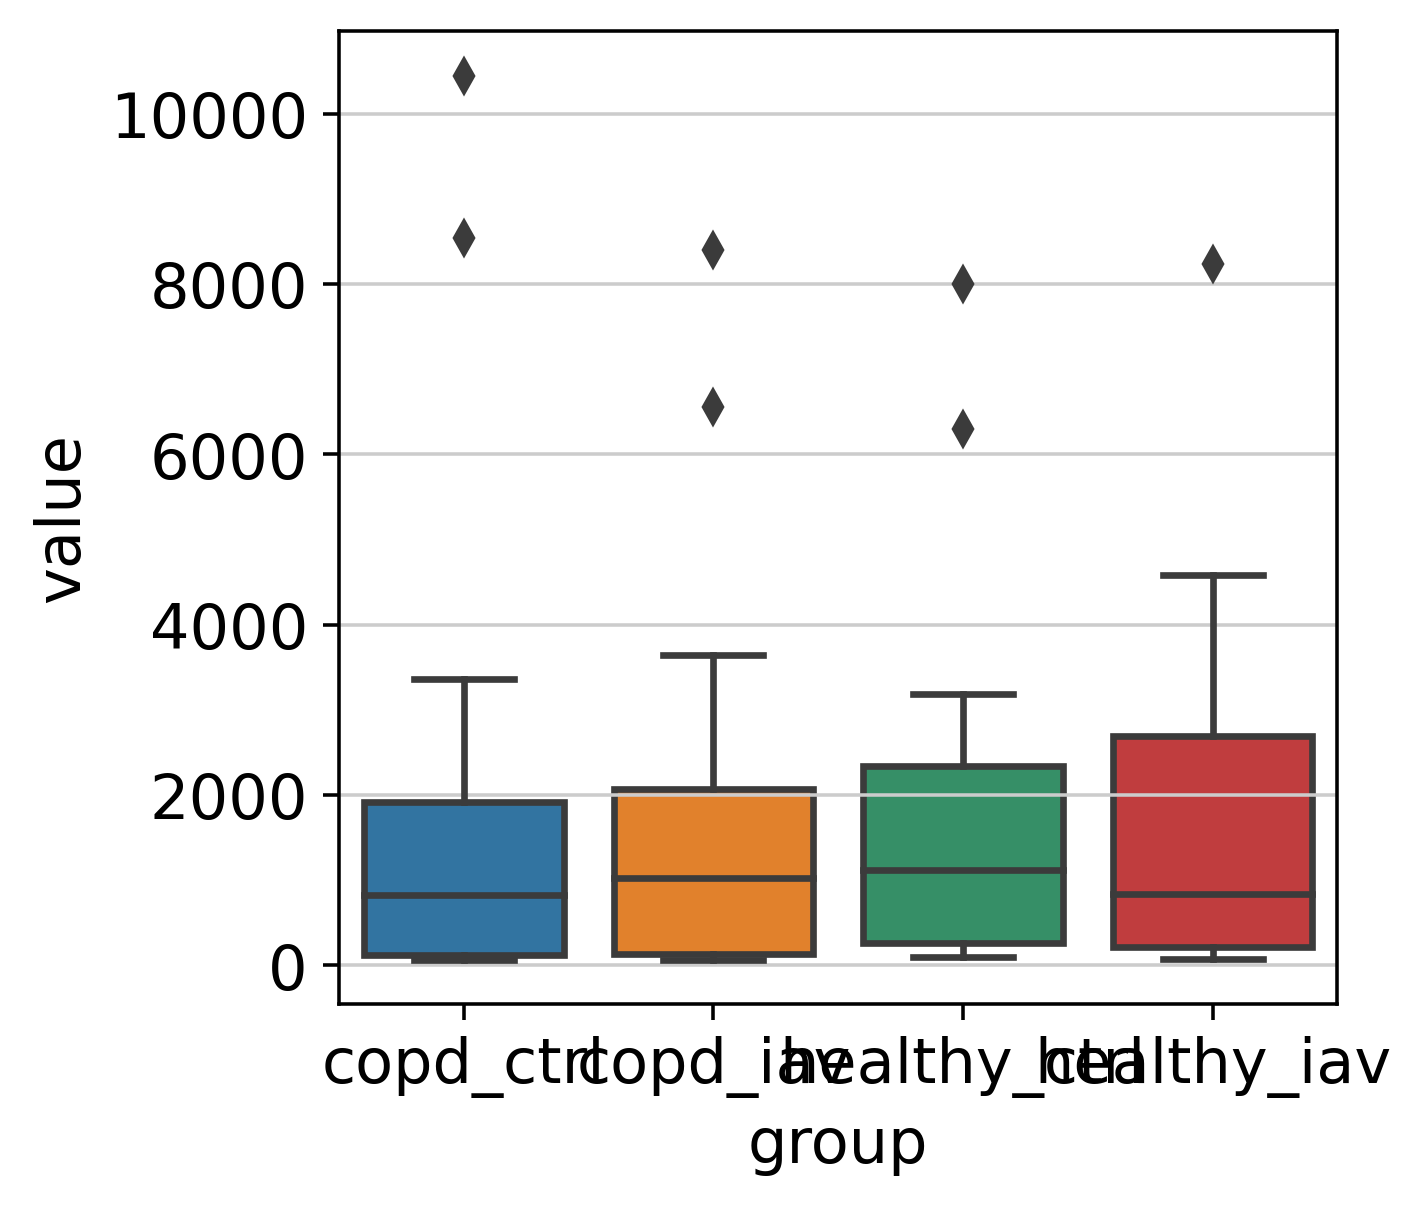

In [9]:
sns.boxplot(x = "group", y = "value", data = table_melted)